Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?




Null hypothesis (H0): The network latency has not have any difference since we switched internet service providers.

Alternative hypothesis (Ha): The network latency has gone up since we switched internet service providers.

True Positive: Occurs when the network latency has indeed gone up since switching internet service providers, and the test correctly detects this increase in latency.
True Negative: Occurs when the network latency has not gone up since switching internet service providers, and the test correctly identifies that there is no increase in latency.No relationship, but we fail to reject

Type I Error (False Positive): Occurs when the network latency has not gone up since switching internet service providers, but the test incorrectly detects an increase in latency and falsely concludes that the latency has increased.
Type II Error (False Negative): Occurs when the network latency has gone up since switching internet service providers, but the test fails to detect this increase and incorrectly concludes that the latency has not increased.

Is the website redesign any good?

Null H0: website redesign does not do any good
Alternative Ha: website redesign boost online sale by 50% by convenient click to buy
    
True Positive: Occurs when the redesign increases sales 1 month after it was released online, and test correctly detect when there are high click to buy rate
True Negative: Occurs when the sales does not increase nor decrease 1 month after the release of a redesigned webpage even with the high click to buy
    
Type I False Positive: Occurs when sales does not increase with website redesign and test incorrectly detect that the sales increased and falsely concludes that the redesign was responsible
Type II error False Negative: Test fails to detect an increase in sales, even though sales has increase within 1 month of deploying new web design

Is our television ad driving more sales?

Null: Television ad does not drive more sales because there are more streaming audience than TV audience
Alternative: Television ad does drive up sales because it still expose product to what is left of TV audience
    
True Positive: Test correctly detect higher sales when TV ad were deploy 1 month
True Negative: Test correctly detect there are no changes in sales after 1 month of ad deployment
    
Type I: False Positive: Test incorrectly detect increase of sales even though sales does not increase after 1 month of ad deployment
Type II: False Negative: Test incorrectly detect no increase in sales even though sales does increase after 1 month of ad deployment.    
    

Exercises
Continue working in your hypothesis_testing notebook.

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

 	              Codeup Student	Not Codeup Student
Uses a Macbook	        49	               20
Doesn't Use A Macbook	1	               30
Choose another 2 categorical variables from the mpg dataset.

State your null and alternative hypotheses.
State your alpha.
Perform a chi2 test of indepedence.
State your conclusion


Null: no relationship between codeup vs noncodeupstudent
Alternative: CodeUp student tend to use Macbook
    

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
from pydataset import data


data_one = np.array([[49, 20],
                 [1, 30]])
contingency_table = pd.DataFrame(data_one, index=['Use Macbook', 'No a Macbook'], columns=['Codeup Student', 'Not Codeup Student'])


chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)




In [4]:
chi2

36.65264142122487

In [5]:
p_value

1.4116760526193828e-09

In [6]:
dof

1

In [7]:
expected

array([[34.5, 34.5],
       [15.5, 15.5]])

In [8]:
a = 0.05
if p_value < a:
    print('rejected Null')
else:
    print('failed to reject Null')
    
#CodeUp student will be using Macbook

rejected Null


This is now became True negative. We rejected Null and test shows the p_value is below alpha

Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [9]:
#import data from pydataset
df = data('mpg')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [10]:
#look at info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [11]:
#use .nunique to see which columns have categorical variables
df.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

In [12]:
#look at year data
df.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [13]:
#look at cyl data
df.cyl.value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

In [14]:
observed = pd.crosstab(df.year, df.cyl)
observed

cyl,4,5,6,8
year,,,,
1999,45,0,45,27
2008,36,4,34,43


CALCULATE chi2 AND P-value

In [15]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [16]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[45  0 45 27]
 [36  4 34 43]]

Expected
[[40  2 39 35]
 [40  2 39 35]]

----
chi^2 = 10.1888
p     = 0.0170


CONCLUDE

In [17]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

NameError: name 'alpha' is not defined

Use the data from the employees database to answer these questions:

In [ ]:
from env import get_connection
from sqlalchemy import create_engine, text

In [ ]:
def get_db_url(database):
    return get_connection(database)

In [ ]:
#set sql query and read in data
url = get_db_url('employees')
query = text("select emp_no, gender, dept_name from employees join dept_emp using (emp_no) join departments using (dept_no) where to_date = '9999-01-01' and dept_name in ('Marketing','Sales')")
engine = create_engine(url)
df = pd.read_sql(query, engine.connect())
df

In [ ]:
#view gender data
df.gender.value_counts()

In [ ]:
#view dept_name data
df.dept_name.value_counts()

In [ ]:
#create contigency table
observed = pd.crosstab(df.gender, df.dept_name)
observed

In [ ]:
#calculate chi2 and p-value
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [ ]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
#conclude
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

Is an employee's gender independent of whether or not they are or have been a manager?

In [ ]:
#set sql query and read in data
url = get_db_url('employees')
query = text("SELECT emp_no, gender, dept_no FROM employees LEFT JOIN dept_manager USING (emp_no)")
engine = create_engine(url)
df = pd.read_sql(query, engine.connect())
df

In [ ]:
#look at data
df.info()

In [ ]:
#look at dept_no data
df.dept_no.value_counts(dropna=False)

In [ ]:
#fill in nulls
df.dept_no = df.dept_no.fillna('not manager')

In [ ]:
df.dept_no.value_counts()

In [ ]:
#make new column using np.where
# np.where( condtion, this happens when true, this happens when false)
df.dept_no = np.where( df.dept_no != 'not manager', 'manager', 'not manager')

In [ ]:
df.dept_no.value_counts()

In [ ]:
#create contigency table
observed = pd.crosstab(df.gender, df.dept_no)
observed

In [ ]:
#calculate chi2 and p-value
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [ ]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
#conclude
if p < alpha:
    print('We reject the null hypothesis')
else:
    print("we fail to reject the null hypothesis")

BONUS!!

In [ ]:
mpg = data('mpg')
mpg['transmission'] = mpg.trans.str[:-4] 
mpg.head()

We will calculate the values we would expect to see if the two groups are independent.
For each subgroup, we calculate the proportion of the total that it is, then multiply each subgroup's proportion by the proportion from every other subgroup to determine the expected values

In [ ]:
n = mpg.shape[0]
transmission_proportions = mpg.transmission.value_counts()/n
transmission_proportions

In [ ]:
drive_proportions = mpg.drv.value_counts()/n
drive_proportions

In [ ]:
expected = pd.DataFrame()
for transmission_group, t_prop in transmission_proportions.items():
    for drive_group, d_prop in drive_proportions.items():
        expected.loc[drive_group, transmission_group] = t_prop * d_prop
        
expected.sort_index(inplace=True)
expected

In [ ]:
expected *= n
expected


In [ ]:
observed = pd.crosstab(mpg.drv, mpg.transmission)
observed

In [ ]:
chi2 = ((observed - expected)**2 / expected).values.sum()
chi2

In [ ]:
nrows, ncols = observed.shape
dof= (nrows - 1) * (ncols - 1)

In [ ]:
stats.chi2(dof).sf(chi2)

Continue working in your hypothesis_testing notebook.

Answer with the type of stats test you would use (assume normal distribution):


Is there a relationship between the length of your arm and the length of your foot?

#I would use the Pearson correlation coefficient due to having continuous variables

Does smoking affect when or not someone has lung cancer?

#smoking and has lung cancer or not are categorical variable and we can use the Chi-Square Test of independence to see if smoking group is independent of the lung cancer group.


Is gender independent of a person’s blood type?


#chi2 test of independent can provide a value for two categorical value to see if a person's gender is independent of a person's blood type

Does whether or not a person has a cat or dog affect whether they live in an apartment?

#again with these two categorical value, I will be using chi square test of independent

Does the length of time of the lecture correlate with a student's grade?


#The length of time of lecture as well as student's grade are two continuous numerical value and we can use the pearsoncorrelation coefficient test to determine if these two groups have any relationship to each other. 


In [39]:
from env import get_connection
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import text, create_engine

Use the telco_churn data

Does tenure correlate with monthly charges?

Does tenure correlate with total charges?

What happens fi you control for phone and internet service?

In [41]:
def get_db_url(database):
    return get_connection(database)
url = get_db_url('telco_churn')
query = ('SELECT * FROM customers')
engine = create_engine(url)

In [43]:
df = pd.read_sql(query, engine.connect())
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


Does tenure correlate with montly charges?

Hypothesis:

Null: There is no linear correlation between tenure and monthly charges

Alerternative: there is a linear correlation between tenure and monthly charges

<Axes: xlabel='tenure', ylabel='monthly_charges'>

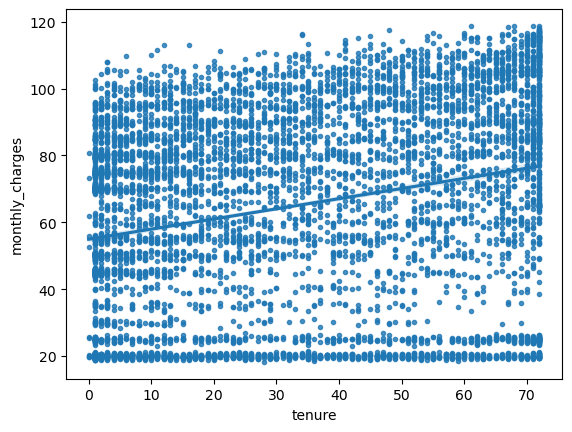

In [46]:
#select the data
charges_df = df[['monthly_charges', 'tenure']]

#plot the data
sns.regplot(x = 'tenure', y= 'monthly_charges', data = charges_df, marker='.')

<Axes: >

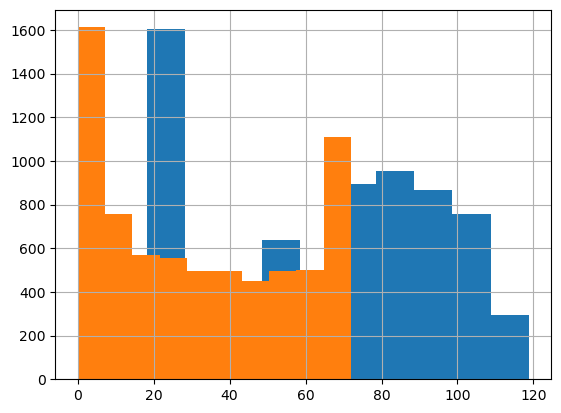

In [51]:
#distributinos of the data to check for normalcy
charges_df.monthly_charges.hist()
charges_df.tenure.hist()


In [55]:
alpha = 0.05
r, p = stats.pearsonr(charges_df.tenure, charges_df.monthly_charges)

def eval_result(alpha, p):
    if p < alpha:
        return print(f'Reject the null hypothesis. There is a linear correlation')
    else: 
        return print(f'We fail to reject the null hypothesis. No correlation')

In [56]:
eval_result(alpha, p)
r

Reject the null hypothesis. There is a linear correlation


0.24789985628615246

### There is a correlation between monthly charges and tenure. With an r of .24, we can say the correlation is "weak-moderate"

Does tenure correlate with total charges?

Null: There is no linear correlation between tenure and total charges.

Alternative: There is a linear correlation between tenure and total charges

In [57]:
alpha = 0.05

#select the data
ttl_charges_df = df[['tenure', 'total_charges']]

# look at a summary of the dataframe
#ttl_charges_df.info()

#try to find the data errors
ttl_charges_df.total_charges.sort_values()

#convert the empty space to '0'
ttl_charges_df['total_charges']= ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')

#confirm our datatypes
ttl_charges_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tenure         7043 non-null   int64  
 1   total_charges  7043 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


/var/folders/mn/mp1xhgm522gc5vhffb_k61d00000gn/T/ipykernel_39879/3707198567.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttl_charges_df['total_charges']= ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')


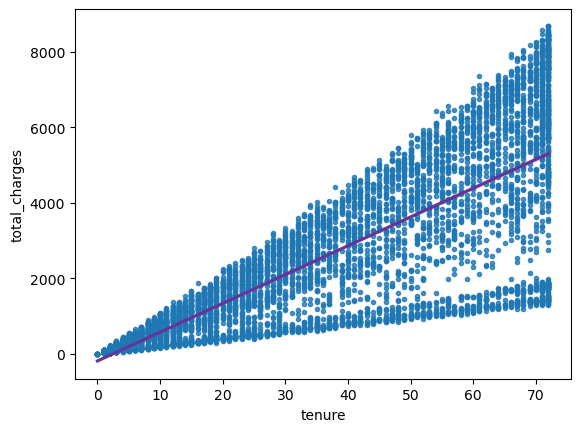

In [58]:
# plot the data
sns.regplot(x = 'tenure', y='total_charges', data = ttl_charges_df, marker='.', line_kws={'color': 'rebeccapurple'})
plt.show()

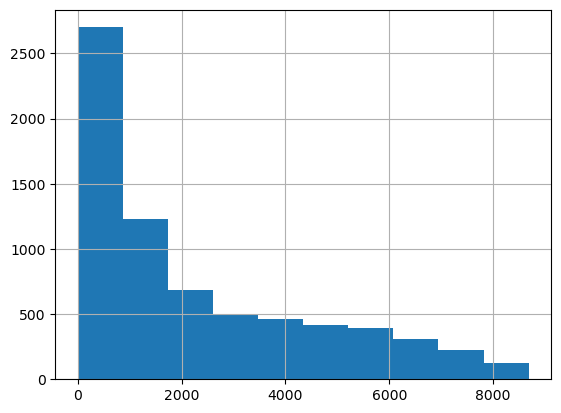

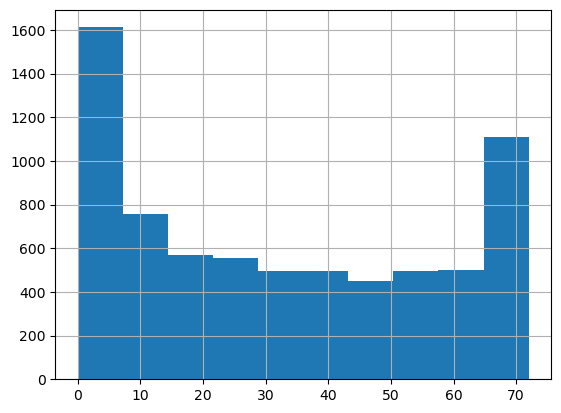

In [59]:
# check assumptions
ttl_charges_df.total_charges.hist()
plt.show()
ttl_charges_df.tenure.hist()
plt.show()

In [60]:
# run our test
r, p = stats.pearsonr(ttl_charges_df.tenure, ttl_charges_df.total_charges)

eval_result(alpha, p)

r

Reject the null hypothesis. There is a linear correlation


0.8261783979502481

In [ ]:
###There is a linear correlation between tenure and total charges.

###With an r of .83, the correlation is strong

What happens if you control for phone and internet service?

Null: There is no linear correlation between tenure and monthly charges.
    
Alternative: There is linear correlation between tenure and monthly charges

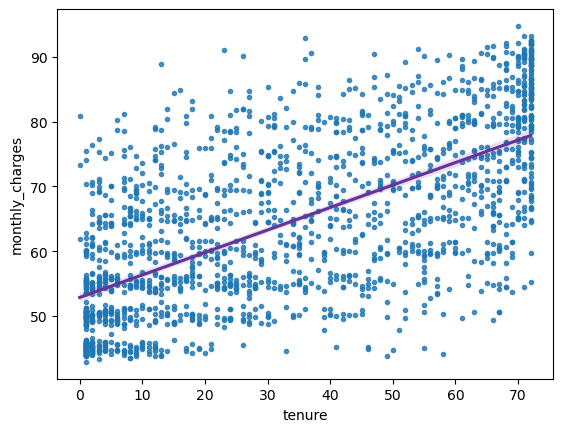

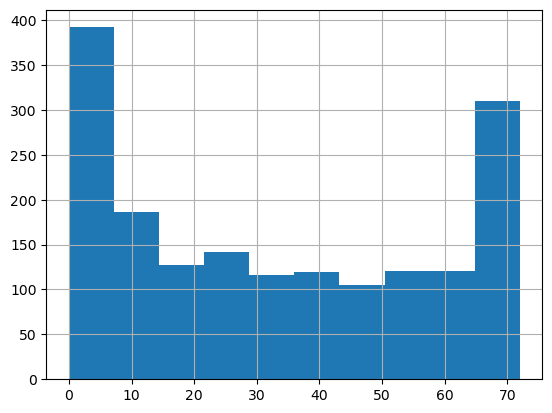

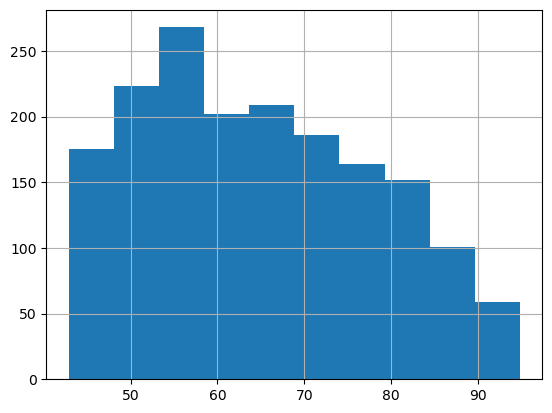

In [61]:
#set alpha 
alpha = 0.05

#select the data
phone_df = df[(df.phone_service == 'Yes') & (df.internet_service_type_id == 1)][['tenure', 'monthly_charges']]

#look at the info
phone_df.info

# plot the data
sns.regplot(x='tenure', y='monthly_charges', data=phone_df, marker='.', 
            line_kws=({'color': 'rebeccapurple'}))
plt.show()

#check for normal distribution
phone_df.tenure.hist()
plt.show()

phone_df.monthly_charges.hist()
plt.show()

In [62]:
r, p = stats.pearsonr(phone_df.tenure, phone_df.monthly_charges)

eval_result(alpha, p)

print(f'r value = {r}')

Reject the null hypothesis. There is a linear correlation
r value = 0.6553845618157271


There is a moderate-strong correlation betwen tenure and monthly charges for customers who have only phone service.

3. Use the employees database.

Is there a relationship between how long an employee has been with the company and their salary?

Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [63]:
url = get_db_url('employees')

query = ("SELECT * FROM employees JOIN salaries USING (emp_no)WHERE to_date = '9999-01-01';")
engine = create_engine(url)
df = pd.read_sql(query,engine.connect())
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB


,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


Is there a relationship between an employee's tenure and their salary?

Null: There is no linear correlation between employee tenure and salary

Alternative: There is a linear correlation between employee tenure and salary

<Axes: xlabel='tenure', ylabel='salary'>

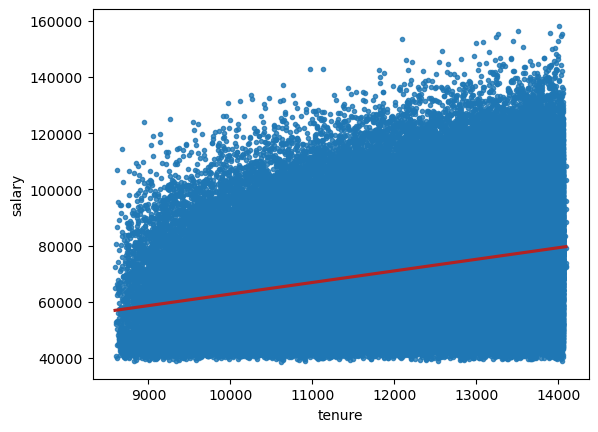

In [64]:
alpha = 0.05

# select our data, calculate tenure
df['tenure'] = pd.to_datetime("today") - pd.to_datetime(df.hire_date) # ddddd hh:mm:ss

df['tenure'] = df.tenure.astype('str').str.split(' ', expand=True)[0].astype('int')

# df.info()
tenure_df = df[['tenure', 'salary']]

# plot the data
sns.regplot(x='tenure', y='salary', data=tenure_df, marker='.',  line_kws=({'color': 'firebrick'}))
#plt.axhline(y=np.nanmean(df.y))


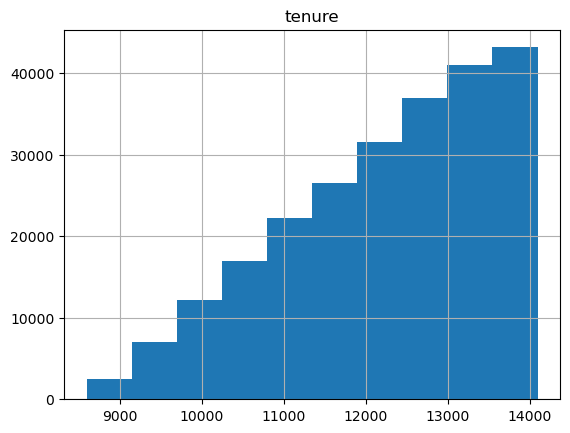

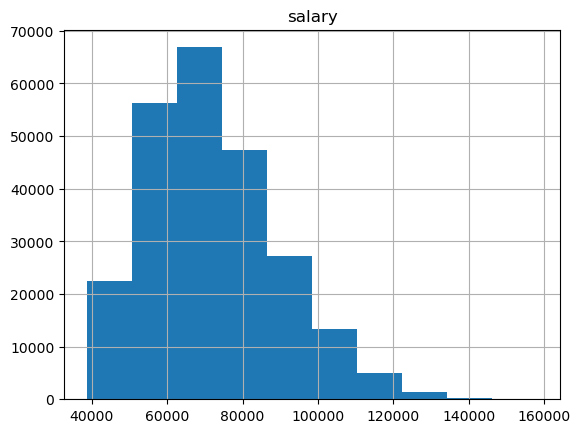

In [65]:
#look at the distribution, look for normality
tenure_df.tenure.hist()
plt.title('tenure')
plt.show()
tenure_df.salary.hist()
plt.title('salary')
plt.show()

In [66]:
# run the test
r, p = stats.pearsonr(tenure_df.tenure, tenure_df.salary)

# evaluate results
eval_result(alpha, p)

print('r value: ', r)

Reject the null hypothesis. There is a linear correlation
r value:  0.3064625613186014


**Takeaways**
There is a moderate correlation between tenure and salary.

Is there a relationship between employee tenure and the number of titles they have had?

Hypothesis:

Null : there is no linear correlation between tenure and number of titles.

Alternative : there is a linear correalation between tenure and number of titles.

In [67]:
alpha = 0.05

# select the data
url = get_db_url('employees')

query = text("SELECT t.emp_no, COUNT(t.title) AS num_titles, te.tenure FROM titles t JOIN (select emp_no, datediff(now(), min(from_date)) AS tenure FROM titles GROUP BY emp_no HAVING max(to_date) = '9999-01-01') te USING (emp_no) GROUP BY t.emp_no;")
engine = create_engine(url)
df = pd.read_sql(query, engine.connect())

df.head()

,emp_no,num_titles,tenure
0,10001,1,13552
1,10002,1,9861
2,10003,1,10105
3,10004,2,13394
4,10005,2,12378


<Axes: xlabel='tenure', ylabel='num_titles'>

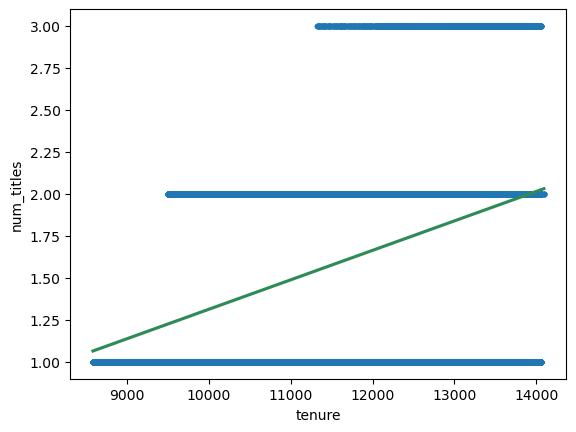

In [68]:
df = df[['num_titles', 'tenure']]

# plot the data
sns.regplot(x='tenure', y='num_titles', data=df, marker='.', line_kws=({'color': 'seagreen'}))

In [69]:
# observatations:
df.num_titles.value_counts()

2    125345
1    111892
3      2887
Name: num_titles, dtype: int64

In [70]:
r, p = stats.pearsonr(df.tenure, df.num_titles)

if p < alpha:
    print("We reject the null hypothesis")
    print("Evidence supports the claim that there is a linear correlation between tenure and number of titles")
else:
    print("We fail to reject the null hypothesis")

r, p

We reject the null hypothesis
Evidence supports the claim that there is a linear correlation between tenure and number of titles


(0.5311014974074266, 0.0)

Takeaways

There is a difference in tenure and number of titles an employee has held.


4. Use the sleepstudy data

A. Is there a relationship between days and reaction time?

In [72]:
from pydataset import data
df = data('sleepstudy')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [ ]:
Null: There is no linear correlation between days and reaction time
    
Alternative: There is alinear correlation between days and reaction time

<Axes: xlabel='Days', ylabel='Reaction'>

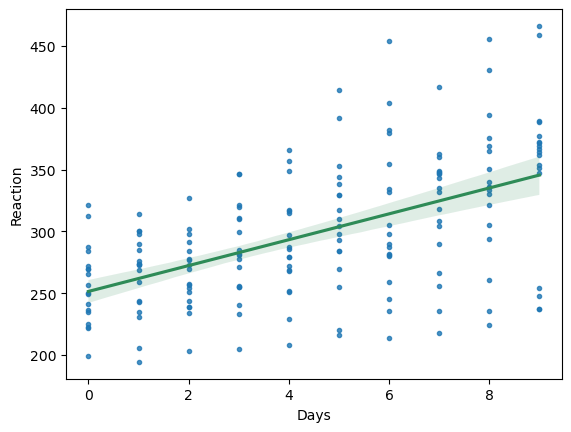

In [73]:
alpha = 0.05

# select the data
df = df[['Reaction', 'Days']]

# plot the data
sns.regplot(x='Days', y='Reaction', data=df, marker='.', line_kws=({'color':'seagreen'}))

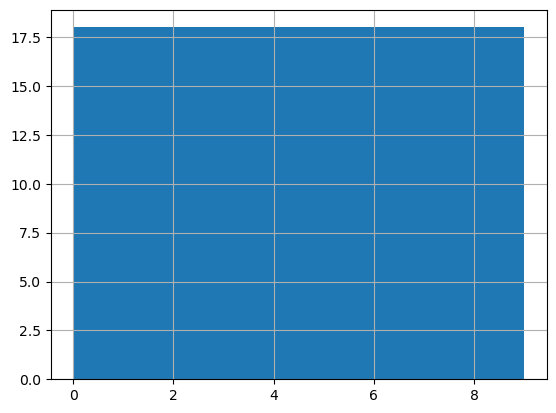

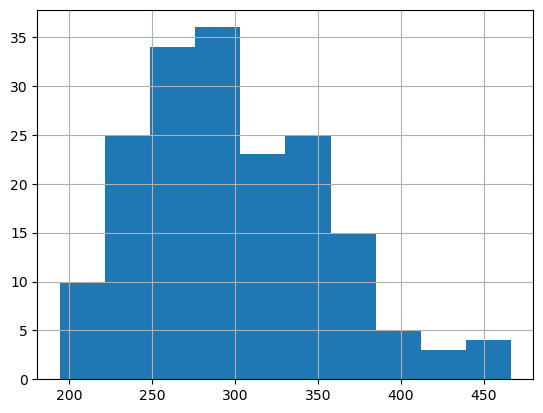

In [74]:
# check for normal distribution, plot histograms
df.Days.hist()
plt.show()

df.Reaction.hist()
plt.show()

In [75]:
# run the spearman test
r, p = stats.spearmanr(df.Days, df.Reaction)
eval_result(alpha, p)
print('r value: ', r)

Reject the null hypothesis. There is a linear correlation
r value:  0.5228138502259547


COMPARISON EXERCISE!!
Answer with the type of test you would use (assume normal distribution):

Is there a difference in grades of students on the second floor compared to grades of all students?
###Two sample t-test and compare the means of grade of students on the second floor vs grades of all students


Are adults who drink milk taller than adults who don't drink milk?### two-sample t-test to compare heights of adults who drink milk vs heights of adult who don't drink milk


Is the price of gas higher in Texas or in New Mexico?
###independent samples t-test to compare the means of gas prices in gas price in Texas vs gas prices in New Mexico

Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
###one-way analysis of variance test to compare students taking data science, web development, and cloud academy. If ANOVA test indicates difference, we can use Tukey's test to perform a test to see which group differ significantly from each other




Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 

Use a .05 level of significance.

In [77]:
a = 0.05

# Sample data for office #1
sample_mean_1 = 90
sample_std_dev_1 = 15
sample_size_1 = 40

# Sample data for office #2
sample_mean_2 = 100
sample_std_dev_2 = 20
sample_size_2 = 50

# Calculate pooled sample variance
pooled_sample_variance = (((sample_size_1 - 1) * sample_std_dev_1**2) + ((sample_size_2 - 1) * sample_std_dev_2**2)) / (sample_size_1 + sample_size_2 - 2)

# Calculate t-statistic
t_statistic = (sample_mean_1 - sample_mean_2) / (pooled_sample_variance * ((1 / sample_size_1) + (1 / sample_size_2)))**0.5

# Degrees of freedom
degrees_of_freedom = sample_size_1 + sample_size_2 - 2

# Two-tailed t-test at 0.05 level of significance
alpha = 0.05
critical_t_value = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)

# Make a decision
if abs(t_statistic) > critical_t_value:
    print("Reject the null hypothesis: There is a significant difference between the mean sales days of office #1 and office #2.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the mean sales days of office #1 and office #2.")




Reject the null hypothesis: There is a significant difference between the mean sales days of office #1 and office #2.


Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
Are compact cars more fuel-efficient than the average car?
Do manual cars get better gas mileage than automatic cars?